# ID3、C4.5、CART决策树算法

建议先阅读[决策树概率与基本流程](./summary.ipynb)。

为方便描述和阅读，再贴一遍学习过程。这篇文章就是第8步的详细扩展。

<img src="./decision-tree-algrithom.jpg" width="600">

## 理论

### 信息增益与ID3

信息论与概率统计中，**熵**（entropy）是随机变量不确定性的度量。

设X是一个取值有限的离散随机变量，其概率分布为

$$P(X=x_i) = p_i,\quad i=1,2,\cdots,n$$

则随机变量X的**熵**定义为

$$H(X) = -\sum_{i=1}^{n}p_i \log p_i$$

熵越大，随机变量的不确定性就越大。

设有随机变量 $(X,Y)$，其联合概率分布为

$$P(X=x_i,Y=y_j) = p_{ij},\quad i=1,2,\cdots,n;\ j=1,2\cdots,m$$

**条件熵**（conditional entropy）$H(Y\ |\ X)$ 表示已知随机变量X的条件下随机变量Y的不确定性，其定义为X给定条件下Y的条件概率分布的熵对X的数学期望

$$H(Y\ |\ X) = \sum_{i=1}^{n}p_iH(Y\ |\ X=x_i)$$

这里，$p_i = P(X=x_i),\quad x=1,2,\cdots,n$。

**信息增益**：特征 $a$ 对训练数据集 $D$ 的信息增益 $g(D, a)$，定义为集合 $D$ 的经验熵 $H(D)$ 与特征 $a$ 给定条件下 $D$ 的经验条件熵 $H(D\ |\ a)$ 之差，即

$$g(D, a) = H(D) - H(D\ |\ a)$$

一般地，熵与条件熵之差称为**互信息**（mutual entropy），决策树学习中的信息增益等价于训练数据集中类与特征的互信息。

显然，信息增益 $g(D, a)$ 表示由于特征 $a$ 而使得对数据集 $D$ 的分类的不确定性减少的程度，因此**可以选择信息增益最大的属性作为划分属性**。

设训练数据集为 $D$，$\mid D \mid$ 表示样本个数。有 $K$ 个类 $C_k$，$k=1,2,\cdots,K$，$\mid C_k \mid$ 为属于类 $C_k$ 的样本个数，$ \sum_{i=1}^{K} \mid C_k \mid = \mid D \mid $。设特征 $a$ 有 $n$ 个不同的取值$ \{a^1, a^2, \cdots , a^n\}$，根据特征 $a$ 的取值将 $ D $ 划分为 $ n$ 个子集 $\ D_1, D_2, \cdots, D_n$，$ \mid D_i \mid$ 为 $D_i$ 的样本个数，$\sum_{i=1}^{n} \mid D_i \mid = \mid D \mid $。记子集 $ D_i $ 中属于类 $C_k$ 的样本的集合为 $ D_{ik} $，即 $ D_{ik} = D_i \cap C_k$，$ \mid D_{ik} \mid$ 为 $D_{ik}$ 样本的个数，信息增益的具体计算如下：

-----

**输入**：训练数据集 $D$ 和特征 $a$；
**输出**：特征 $a$ 对训练数据集 $D$ 的信息增益 $g(D, a)$。

1 计算数据集 $D$ 的经验熵

$$H(D) = -\sum_{k=1}^{K} \frac{|C_k|}{|D|}\log_2 \frac{|C_k|}{|D|}$$

2 计算特征 $a$ 对数据集 $D$ 的经验条件熵

$$H(D\ |\ a) = \sum_{i=1}^{n} \frac{|D_i|}{|D|}H(D_i) = -\sum_{i=1}^{n}\frac{|D_i|}{|D|} \sum_{k=1}^{K} \frac{|D_{ik}|}{|D_i|} \log_2 \frac{|D_{ik}|}{|D_i|}$$

3 计算信息增益

$$g(D, a) = H(D) - H(D\ |\ a)$$

------

**ID3决策树学习算法就是以信息增益为准则来选择划分属性**，即在上面伪代码第8行选择属性 $a_* = \underset{a \in A}{\arg \max}\ g(D,a)$。

> ID3中的ID是Iterative Dichotomiser（迭代二分器）的简称。



### 增益率与C4.5

信息增益准则对可取值数目较多的属性有所偏好，为减少这种偏好可能带来的不利影响，著名的**C4.5**决策树算法不直接使用信息增益，而是使用**增益率**（gain ratio）来选择最优划分属性。

特征a对训练数据集D的增益率 $g_R(D, a)$ 定义为其信息增益 $g(D, a)$ 与训练数据集D关于特征a的值的熵 $H_{a}(D)$ 之比：

$$g_R (D, a) = \frac{g(D, a)}{H_{a}(D)}$$

其中，$H_{a}(D) = - \sum_{i=1}^{n} \frac{\mid D_i \mid}{\mid D \mid} \log_{2} \frac{\mid D_i \mid}{\mid D \mid}$，n是特征a取值的个数。

信息增益比准则对取值数目较少的属性有所偏好。C4.5并不直接选择信息增益比最大的属性进行划分，而是使用了一个启发式：先从候选划分属性中找出信息增益高于平均水平的属性，再从中选择信息增益比最高的。

### 基尼指数与CART

CART（Classification And Regression Tree，分类与回归树）决策树使用**基尼指数**（Gini index）来选择划分属性。

分类问题中，假设有K个类，样本点属于第k类的概率为 $p_k$，则概率分布的基尼指数定义为

$$\begin{align*} \text{Gini}(p) = \sum_{k=1}^{K} p_k (1- p_{k}) = 1 - \sum_{k=1}^{K}p_k^2 \end{align*}$$

对于给定的样本集合D，其基尼指数为

$$\text{Gini} (D) = 1 - \sum_{k=1}^{K} \left( \frac{\mid C_k \mid}{\mid D \mid} \right) ^2$$

这里，$C_k$ 是D中属于第k类的样本子集，K是类的个数。

样本集合D根据属性a的取值可以分为n部分：$D_1, D_2, \ldots, D_n$。则，在属性a的条件下，集合D的基尼指数定义为

$$\text{Gini} (D, a) = \sum_{i=1}^{n} \frac{\mid D_i \mid }{\mid D \mid} \text{Gini} (D_i) $$

基尼指数 $\text{Gini} (D)$ 表示集合D的不确定性，基尼指数 $\text{Gini} (D, a)$  表示经属性a分割后集合D的不确定性。基尼指数越大，样本的不确定性也就越大。


CART决策树在候选属性集合A中，选择那个使得划分后**基尼指数最小**的属性作为最优划分属性，即 $a_* = \underset{a \in A}{\arg \max}\  \text{Gini}(D, a)$。


> **基尼指数与熵**
>
> 首先，对 $-\ln x$在 $x=1$ 处泰勒展开，忽略高阶无穷小，可以得到$-\ln x \approx 1 - x$
>
> 若熵中的对数不是以2为底，而是以e为底：
>
> $$\begin{align*} H(D) &= -\sum_{k=1}^{K}p_k \ln p_k \\ &\approx \sum_{k=1}^{K} p_k (1-p_k) \\ &= \text{Gini}(D) \end{align*} $$

## Demo

通过例子对特征选择有一个直观的认识。以如下一份来自周志华老师《机器学习》的西瓜数据集为例，演示ID3决策树的学习过程。

In [1]:
import pandas as pd
from collections import OrderedDict

data_dict = OrderedDict( (
        ('色泽', ['青绿', '乌黑', '乌黑', '青绿', '浅白', '青绿', '乌黑', '乌黑', '乌黑', '青绿', '浅白', '浅白', '青绿', '浅白', '乌黑', '浅白', '青绿']),
        ('根蒂', ['蜷缩', '蜷缩', '蜷缩', '蜷缩', '蜷缩', '稍蜷', '稍蜷', '稍蜷', '稍蜷', '硬挺', '硬挺', '蜷缩', '稍蜷', '稍蜷', '稍蜷', '蜷缩', '蜷缩']),
        ('敲声', ['浊响', '沉闷', '浊响', '沉闷', '浊响', '浊响', '浊响', '浊响', '沉闷', '清脆', '清脆', '浊响', '浊响', '沉闷', '浊响', '浊响', '沉闷']),
        ('纹理', ['清晰', '清晰', '清晰', '清晰', '清晰', '清晰', '稍糊', '清晰', '稍糊', '清晰', '模糊', '模糊', '稍糊', '稍糊', '清晰', '模糊', '稍糊']),
        ('脐部', ['凹陷', '凹陷', '凹陷', '凹陷', '凹陷', '稍凹', '稍凹', '稍凹', '稍凹', '平坦', '平坦', '平坦', '凹陷', '凹陷', '稍凹', '平坦', '稍凹']),
        ('触感', ['硬滑', '硬滑', '硬滑', '硬滑', '硬滑', '软粘', '软粘', '硬滑', '硬滑', '软粘', '硬滑', '软粘', '硬滑', '硬滑', '软粘', '硬滑', '硬滑']),
        ('好瓜', ['是', '是', '是', '是', '是', '是', '是', '是', '否', '否', '否', '否', '否', '否', '否', '否', '否'])
    ) )

data = pd.DataFrame.from_dict(data_dict)
data

,色泽,根蒂,敲声,纹理,脐部,触感,好瓜
0,青绿,蜷缩,浊响,清晰,凹陷,硬滑,是
1,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,是
2,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,是
3,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,是
4,浅白,蜷缩,浊响,清晰,凹陷,硬滑,是
5,青绿,稍蜷,浊响,清晰,稍凹,软粘,是
6,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,是
7,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,是
8,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,否
9,青绿,硬挺,清脆,清晰,平坦,软粘,否


在开始看例子之前，先引入绘制决策树的函数（来自于《机器学习实战》），方便后面对决策树有直观的认识。

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# 定义文本框和箭头格式
decisionNode = dict(boxstyle='sawtooth', fc='0.8')
leafNode = dict(boxstyle='round4', fc='0.8') #叶结点
arrow_args = dict(arrowstyle='<-') #箭头类型

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    """ 绘制一个结点，并有箭头指向该结点
    Args:
        nodeTxt：结点文字
        centerPt：结点位置
        parentPt：箭头起始位置
        nodeType：结点类型，decisionNode或leafNode
    """
    # 全局变量createPlot.ax1定义了绘图区
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',
                            xytext=centerPt, textcoords='axes fraction',
                            va='center', ha='center', bbox=nodeType, arrowprops=arrow_args)

def getNumLeafs(myTree):
    """ 获取叶结点的数目
    """
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs
            
def getTreeDepth(myTree):
    """ 获取树的层数
    """
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

def plotMidText(cntrPt, parentPt, txtString):
    """ 在父子结点间填充文本信息
    Args：
        cntrPt：结点位置
        parentPt：箭头起始位置
        txtString：文字
    """
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)
    
def plotTree(myTree, parentPt, nodeTxt):
    """ 绘制树
    """
    numLeafs = getNumLeafs(myTree) #当前树宽
    depth = getTreeDepth(myTree) # 当前树高
    firstStr = list(myTree.keys())[0] #根结点的属性
    
    # x的偏移量要保证在 0.5/plotTree.totalW 到 (plotTree.totalW-0.5) / plotTree.totalW 的范围内均匀分布
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode) #绘制根结点
    secondDict = myTree[firstStr] # 根结点的子树
    
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD # 绘制下一层的时候，y减去一层的高度
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            # 子树是一棵树，递归绘制
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            # 子树不是树，那么是一个叶子结点
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
            
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD # 回到当前层的位置
    

def createPlot(inTree):
    """ 绘制入口
    整个绘图在x=(0, 1.0)，y=(0, 1.0)的范围内完成。左下角是点(0, 0)，右上角是点(1.0, 1.0)。
    所以，根结点的中心在(0.5, 1.0)处
    """
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW # 按照叶子结点数目将x轴划分为若干部分
    plotTree.yOff = 1.0 # y的偏移量以1为基准
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

该数据集包含17个训练样例，用以学习一棵能预测没剖开的是不是好瓜的决策树。显然，类别个数K=2。在决策树学习开始时，根结点包含D中所有样例，其中正例占 $\frac{\mid C_1 \mid}{\mid D \mid} = \frac{8}{17}$，反例占 $\frac{\mid C_2 \mid}{\mid D \mid} = \frac{9}{17}$。于是，可以计算出根结点的信息熵为

$$ H(D) = - \sum_{k=1}^{2} \frac{\mid C_k \mid}{\mid D \mid} \log_2 \frac{\mid C_k \mid}{\mid D \mid} = - \left( \frac{8}{17} \log_2 \frac{8}{17} + \frac{9}{17} \log_2 \frac{9}{17} \right) = 0.998 $$

代码如下：

In [3]:
import math
def calc_entropy(list_p):
    """ 计算信息熵
    """
    e = 0.0
    for p in list_p:
        e -= p * math.log(p, 2) 
    return e

def information_entropy(d):
    list_p = []
    for i in set(d['好瓜']):
        list_p.append(len(d[d['好瓜'] == i]) / len(d))
    
    return calc_entropy(list_p)

print('根结点的信息熵：', information_entropy(data))

根结点的信息熵： 0.9975025463691153


然后，我们要计算出当前属性集合{色泽，根蒂，敲声，纹理，脐部，触感}中每个属性的信息增益。以属性“色泽”为例，它有3个可能的取值：{青绿，乌黑，浅白}。若使用该属性对D进行划分，则可得到三个子集，分别记为：$D_1$（色泽=青绿），$D_2$（色泽=乌黑），$D_3$（色泽=浅白）。它们的信息熵分别为

$$\begin{align*}
H(D_1) &= - \left( \frac{3}{6} \log_2 \frac{3}{6} + \frac{3}{6} \log_2 \frac{3}{6} \right) = 1.000\\
H(D_2) &= - \left( \frac{4}{6} \log_2 \frac{4}{6} + \frac{2}{6} \log_2 \frac{2}{6} \right) = 0.918\\
H(D_3) &= - \left( \frac{1}{5} \log_2 \frac{1}{5} + \frac{1}{5} \log_2 \frac{1}{5} \right) = 0.722\\
\end{align*}$$



可计算出属性色泽对数据集D的经验条件熵（github公式中汉字显式有问题，所以使用拼音）：

$$ \begin{align*}
H(D \mid \text{seze}) &= \sum_{i=1}^{3} \frac{\mid D_i \mid}{\mid D \mid}H(D_i) \\
&= \frac{6}{17} \times 1.000 + \frac{6}{17} \times 0.918 + \frac{5}{17} \times 0.722 \\
&= 0.889
\end{align*}$$

进而，可以计算出属性“色泽”的信息增益：

$$ g(D, \text{seze}) = H(D) - H(D \mid \text{seze}) = 0.998 - 0.889 = 0.109$$

类似的，可以计算出其他属性的信息增益：

- 根蒂：$g(D, \text{gendi}) = 0.143$
- 敲声：$g(D, \text{qiaosheng}) = 0.141$
- 纹理：$g(D, \text{wenli}) = 0.381$
- 脐部：$g(D, \text{qibu}) = 0.289$
- 触感：$g(D, \text{chugan}) = 0.006$

显然，属性“纹理”的信息增益最大，于是它被选为划分属性。下面的绘图显式出了基于”纹理“对根结点进行划分的结果。

以上描述的代码如下：

In [4]:
def condition_entropy(d, a):
    ce = 0
    for i in set(d[a]):
        ce += information_entropy(d[d[a] == i]) * len(data[data[a] == i]) / len(data)
    return ce

def information_gain(d, a):
    return information_entropy(d) - condition_entropy(d, a)

print('属性“%s”对数据集D的经验条件熵：%.3f。该属性的信息增益：%.3f' % ('色泽', condition_entropy(data, '色泽'), information_gain(data, '色泽')))
print('属性“%s”对数据集D的经验条件熵：%.3f。该属性的信息增益：%.3f' % ('根蒂', condition_entropy(data, '根蒂'), information_gain(data, '根蒂')))
print('属性“%s”对数据集D的经验条件熵：%.3f。该属性的信息增益：%.3f' % ('纹理', condition_entropy(data, '纹理'), information_gain(data, '纹理')))
print('属性“%s”对数据集D的经验条件熵：%.3f。该属性的信息增益：%.3f' % ('脐部', condition_entropy(data, '脐部'), information_gain(data, '脐部')))
print('属性“%s”对数据集D的经验条件熵：%.3f。该属性的信息增益：%.3f' % ('触感', condition_entropy(data, '触感'), information_gain(data, '触感')))

属性“色泽”对数据集D的经验条件熵：0.889。该属性的信息增益：0.108
属性“根蒂”对数据集D的经验条件熵：0.855。该属性的信息增益：0.143
属性“纹理”对数据集D的经验条件熵：0.617。该属性的信息增益：0.381
属性“脐部”对数据集D的经验条件熵：0.708。该属性的信息增益：0.289
属性“触感”对数据集D的经验条件熵：0.991。该属性的信息增益：0.006


经过第一步属性选择后，得到如下所示的决策树：

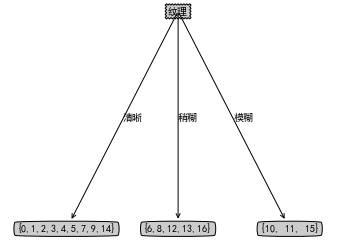

In [5]:
# 中文乱码时，需要设置字体。Windows系统适用
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

tree = {'纹理': {'清晰': '{0,1,2,3,4,5,7,9,14}', '稍糊': '{6,8,12,13,16}', '模糊': '{10, 11, 15}'}}
createPlot(tree)

然后，决策树学习算法将对每个分支结点做进一步划分。以上图中第一个分支结点（纹理=清晰）为例，该结点包含的样例集合 $D_1$ 中有编号为{0,1,2,3,4,5,7,9,14}的9个样例，可用属性集合为{色泽，根蒂，敲声，脐部，触感}。基于 $D_1$ 计算出各属性的信息增益：

- $g(D_1, \text{seze}) = 0.043$
- $g(D_1, \text{gendi}) = 0.458$
- $g(D_1, \text{qiaosheng}) = 0.331$
- $g(D_1, \text{qibu}) = 0.458$
- $g(D_1, \text{chugan}) = 0.458$

“根蒂”、“脐部”、“触感”3个属性均取得了最大的信息增益，可任选其中之一作为划分属性。类似的，对每个分支结点进行上述操作，最终得到的决策树如下。

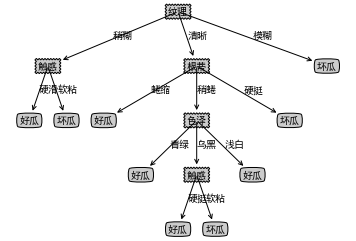

In [6]:
tree = {
    '纹理': {
         '稍糊': {
            '触感': {
                '硬滑': '好瓜',
                '软粘': '坏瓜'
            }
        },
        '清晰': {
            '根蒂': {
                '蜷缩': '好瓜',
                '稍蜷': {
                    '色泽': {
                        '青绿': '好瓜',
                        '乌黑': {
                            '触感': {
                                '硬挺': '好瓜',
                                '软粘': '坏瓜'
                            }
                        },
                        '浅白': '好瓜'
                    }
                },
                '硬挺': '坏瓜'
            }
        },
        '模糊': '坏瓜'}
}
createPlot(tree)

完整的决策树构建代码如下，得到的结果与上面略有不同，是因为有时候几个属性的信息增益相等，随机选择的属性不相同导致。

{'纹理': {'模糊': '坏瓜', '清晰': {'触感': {'硬滑': '好瓜', '软粘': {'色泽': {'乌黑': '坏瓜', '青绿': {'根蒂': {'硬挺': '坏瓜', '稍蜷': '好瓜'}}}}}}, '稍糊': {'触感': {'硬滑': '坏瓜', '软粘': '好瓜'}}}}


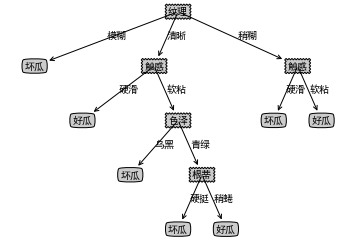

In [8]:
def max_gain(d):
    max_gain = 0.0
    max_a = ''
    for a in list(d.columns):
        if a == '好瓜':
            continue
        
        g = information_gain(d, a)
        if max_gain < g:
            max_gain = g; max_a = a
    return max_a

def create_tree(d):
    # 类别完全相同时停止划分
    if len(d.loc[:, '好瓜'].value_counts()) == 1:
        return '坏瓜' if d.loc[:, '好瓜'].iloc[0] == '否' else '好瓜'
    # 没有特征可以用了
    if len(d.columns) == 1:
        return d.loc[:, '好瓜'].value_counts().idxmax()
            
    max_a = max_gain(d) # 选择特征
    
    myTree = {max_a: {}}
    for aa in set(d[max_a]):
        myTree[max_a][aa] = create_tree(d.loc[d[max_a]==aa, :].drop(max_a, axis=1))
    
    return myTree

t = create_tree(data)
print(t)
createPlot(t)